In [1]:
# imports
import pandas as pd
import StringIO
import zipfile
import requests
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re

%matplotlib inline

In [2]:
# retrieve Capital Bike Share Q2 2015 data
r = requests.get('https://www.capitalbikeshare.com/assets/files/trip-history-data/2015-Q2-Trips-History-Data.zip')
z = zipfile.ZipFile(StringIO.StringIO(r.content))
df = pd.read_csv(z.open('2015-Q2-Trips-History-Data.csv'))
df.head()

,Duration (ms),Start date,Start station,End date,End station,Bike number,Subscription type
0,1761773,6/30/2015 23:58,17th St & Massachusetts Ave NW,7/1/2015 0:27,USDA / 12th & Independence Ave SW,W21320,Casual
1,193188,6/30/2015 23:58,5th & K St NW,7/1/2015 0:01,3rd & H St NW,W20832,Member
2,2895041,6/30/2015 23:57,Jefferson Dr & 14th St SW,7/1/2015 0:45,Jefferson Dr & 14th St SW,W21519,Casual
3,2845488,6/30/2015 23:57,Jefferson Dr & 14th St SW,7/1/2015 0:44,Jefferson Dr & 14th St SW,W00335,Casual
4,1130426,6/30/2015 23:57,Park Rd & Holmead Pl NW,7/1/2015 0:16,1st & Rhode Island Ave NW,W20576,Member


In [3]:
# inspect data
print df.shape, '\n'
print df.dtypes, '\n'
print df.columns.values, '\n'
print df.describe(), '\n'
print df.isnull().sum()

(999073, 7) 

Duration (ms)         int64
Start date           object
Start station        object
End date             object
End station          object
Bike number          object
Subscription type    object
dtype: object 

['Duration (ms)' 'Start date' 'Start station' 'End date' 'End station'
 'Bike number' 'Subscription type'] 

         Duration (ms)
count    999073.000000
mean    1184413.703097
std     1997204.428632
min       60026.000000
25%      423413.000000
50%      728747.000000
75%     1249158.000000
max    85941046.000000 

Duration (ms)        0
Start date           0
Start station        0
End date             0
End station          0
Bike number          0
Subscription type    0
dtype: int64


In [4]:
# add column with duration in datetime format
df['Duration(h:m:s)'] = pd.to_timedelta(df['Duration (ms)'],unit='ms')

# turn 'Start Date' and 'End Date' into datetime objects TOO SLOW
#df['Start date'] = pd.to_datetime(df['Start date'])
#df['End date'] = pd.to_datetime(df['End date'])

print df.head()
print df.dtypes

   Duration (ms)       Start date                   Start station  \
0        1761773  6/30/2015 23:58  17th St & Massachusetts Ave NW   
1         193188  6/30/2015 23:58                   5th & K St NW   
2        2895041  6/30/2015 23:57       Jefferson Dr & 14th St SW   
3        2845488  6/30/2015 23:57       Jefferson Dr & 14th St SW   
4        1130426  6/30/2015 23:57         Park Rd & Holmead Pl NW   

        End date                        End station Bike number  \
0  7/1/2015 0:27  USDA / 12th & Independence Ave SW      W21320   
1  7/1/2015 0:01                      3rd & H St NW      W20832   
2  7/1/2015 0:45          Jefferson Dr & 14th St SW      W21519   
3  7/1/2015 0:44          Jefferson Dr & 14th St SW      W00335   
4  7/1/2015 0:16          1st & Rhode Island Ave NW      W20576   

  Subscription type  Duration(h:m:s)  
0            Casual  00:29:21.773000  
1            Member  00:03:13.188000  
2            Casual  00:48:15.041000  
3            Casual  00:47

In [5]:
# re-name columns to remove spaces
df.columns = ['Duration(ms)','Start_date','Start_station','End_date','End_station','Bike_number','Subscription_type','Duration(h:m:s)']
df.head()

,Duration(ms),Start_date,Start_station,End_date,End_station,Bike_number,Subscription_type,Duration(h:m:s)
0,1761773,6/30/2015 23:58,17th St & Massachusetts Ave NW,7/1/2015 0:27,USDA / 12th & Independence Ave SW,W21320,Casual,00:29:21.773000
1,193188,6/30/2015 23:58,5th & K St NW,7/1/2015 0:01,3rd & H St NW,W20832,Member,00:03:13.188000
2,2895041,6/30/2015 23:57,Jefferson Dr & 14th St SW,7/1/2015 0:45,Jefferson Dr & 14th St SW,W21519,Casual,00:48:15.041000
3,2845488,6/30/2015 23:57,Jefferson Dr & 14th St SW,7/1/2015 0:44,Jefferson Dr & 14th St SW,W00335,Casual,00:47:25.488000
4,1130426,6/30/2015 23:57,Park Rd & Holmead Pl NW,7/1/2015 0:16,1st & Rhode Island Ave NW,W20576,Member,00:18:50.426000


In [6]:
# add column for start month to dataframe
dates = pd.DatetimeIndex(df.Start_date)
df['Start_month'] = dates.month
df.head()

,Duration(ms),Start_date,Start_station,End_date,End_station,Bike_number,Subscription_type,Duration(h:m:s),Start_month
0,1761773,6/30/2015 23:58,17th St & Massachusetts Ave NW,7/1/2015 0:27,USDA / 12th & Independence Ave SW,W21320,Casual,00:29:21.773000,6
1,193188,6/30/2015 23:58,5th & K St NW,7/1/2015 0:01,3rd & H St NW,W20832,Member,00:03:13.188000,6
2,2895041,6/30/2015 23:57,Jefferson Dr & 14th St SW,7/1/2015 0:45,Jefferson Dr & 14th St SW,W21519,Casual,00:48:15.041000,6
3,2845488,6/30/2015 23:57,Jefferson Dr & 14th St SW,7/1/2015 0:44,Jefferson Dr & 14th St SW,W00335,Casual,00:47:25.488000,6
4,1130426,6/30/2015 23:57,Park Rd & Holmead Pl NW,7/1/2015 0:16,1st & Rhode Island Ave NW,W20576,Member,00:18:50.426000,6


In [7]:
# how many bike stations are there?
print 'there are', len(df.Start_station.unique()), 'capital bikeshare stations'
station_list = df.Start_station.unique()
assert(sorted(list(df.Start_station.unique())) == sorted(list(df.End_station.unique())))

there are 353 capital bikeshare stations


In [8]:
# how many bikes are there?
print '\nthere are', len(df.Bike_number.unique()), 'capital bikeshare stations'


there are 3502 capital bikeshare stations


In [9]:
# what is the most popular starting station? And most popular ending station?
df_pop_start = df.groupby('Start_station')['Start_date'].count().reset_index()
df_pop_start = df_pop_start.sort('Start_date',ascending=False)
df_pop_start.columns = ['Start_station','Count']
print df_pop_start.head()

print '\n'

df_pop_end = df.groupby('End_station')['End_date'].count().reset_index()
df_pop_end = df_pop_end.sort('End_date',ascending=False)
df_pop_end.columns = ['End_station','Count']
print df_pop_end.head()

                            Start_station  Count
237                      Lincoln Memorial  24834
168       Columbus Circle / Union Station  21107
223             Jefferson Dr & 14th St SW  20941
248  Massachusetts Ave & Dupont Circle NW  17638
224                    Jefferson Memorial  14010


                              End_station  Count
237                      Lincoln Memorial  24861
168       Columbus Circle / Union Station  21747
223             Jefferson Dr & 14th St SW  21240
248  Massachusetts Ave & Dupont Circle NW  20148
224                    Jefferson Memorial  14264


In [10]:
# what is the least popular starting station? And least popular ending station?
df_npop_start = df.groupby('Start_station')['Start_date'].count().reset_index()
df_npop_start = df_npop_start.sort('Start_date',ascending=True)
df_npop_start.columns = ['Start_station','Count']
print df_npop_start.head()

print '\n'

df_npop_end = df.groupby('End_station')['End_date'].count().reset_index()
df_npop_end = df_npop_end.sort('End_date',ascending=True)
df_npop_end.columns = ['End_station','Count']
print df_npop_end.head()

                        Start_station  Count
131                  Alta Tech Office      3
321              Shady Grove Hospital      4
179    Crabbs Branch Way & Redland Rd     12
151          Broschart & Blackwell Rd     15
298  Randle Circle & Minnesota Ave SE     17


                        End_station  Count
131                Alta Tech Office      3
321            Shady Grove Hospital      6
192                 Fairfax Village      8
151        Broschart & Blackwell Rd     12
179  Crabbs Branch Way & Redland Rd     16


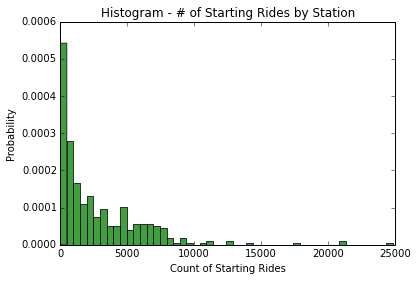

In [11]:
# histogram of all the starting rides per station
plt.hist(df_pop_start.Count, 50, normed=1, facecolor='g', alpha=0.75)
plt.xlabel('Count of Starting Rides')
plt.ylabel('Probability')
plt.title('Histogram - # of Starting Rides by Station')
plt.show()

In [12]:
# what is the average number of starting rides per station?
print df_pop_start.Count.mean()
print df_pop_start.Count.median()

2830.23512748
1557.0


In [13]:
# what bike when on the most rides? the least?
df_bike_start = df.groupby('Bike_number')['Start_date'].count().reset_index()
df_bike_start = df_bike_start.sort('Start_date',ascending=False)
df_bike_start.columns = ['Bike_number','Count']
print df_bike_start.head()

print df_bike_start.tail() # this doesn't show bikes that didn't go on any rides

# how many bikes only went on 1 ride?
df_bike_start_1 = df_bike_start[df_bike_start.Count == 1]
print '\n', len(df_bike_start_1)

# what was the average number of rides per bike?
print '\n', df_bike_start.Count.mean()
print '\n',df_bike_start.Count.median()

     Bike_number  Count
3483      W22231    599
1596      W20255    582
3312      W22055    546
3128      W21852    543
3373      W22117    536
     Bike_number  Count
1027      W01134      1
2341      W21026      1
997       W01099      1
250       W00285      1
123       W00146      1

8

285.286407767

301.0


In [14]:
# which month is the most popular month for rides in Q2?
df_month = df.groupby('Start_month').End_date.count().reset_index()
print df_month

   Start_month  End_date
0            4    318127
1            5    366930
2            6    314016


In [15]:
# what's the longest, shortest, and average ride length?
print df['Duration(h:m:s)'].max()
print '\n', df['Duration(h:m:s)'].min()
print '\n', df['Duration(h:m:s)'].mean()
print '\n', df['Duration(h:m:s)'].median()

0 days 23:52:21.046000

0 days 00:01:00.026000

0 days 00:19:44.413703

0 days 00:12:08.747000


In [16]:
# does the data include rides that begin and end at the same station?
df_same_station = df[df.Start_station == df.End_station]
df_same_station.head()

,Duration(ms),Start_date,Start_station,End_date,End_station,Bike_number,Subscription_type,Duration(h:m:s),Start_month
2,2895041,6/30/2015 23:57,Jefferson Dr & 14th St SW,7/1/2015 0:45,Jefferson Dr & 14th St SW,W21519,Casual,00:48:15.041000,6
3,2845488,6/30/2015 23:57,Jefferson Dr & 14th St SW,7/1/2015 0:44,Jefferson Dr & 14th St SW,W00335,Casual,00:47:25.488000,6
9,3062604,6/30/2015 23:54,Jefferson Dr & 14th St SW,7/1/2015 0:45,Jefferson Dr & 14th St SW,W00530,Casual,00:51:02.604000,6
10,3030655,6/30/2015 23:54,Jefferson Dr & 14th St SW,7/1/2015 0:44,Jefferson Dr & 14th St SW,W21332,Casual,00:50:30.655000,6
66,1253561,6/30/2015 23:26,MLK Library/9th & G St NW,6/30/2015 23:47,MLK Library/9th & G St NW,W20608,Casual,00:20:53.561000,6


In [17]:
# the data doesn't include rides less than one minute
# what was the shortest ride
df_shortest = df[df['Duration(h:m:s)'] == df['Duration(h:m:s)'].min()]
df_shortest

,Duration(ms),Start_date,Start_station,End_date,End_station,Bike_number,Subscription_type,Duration(h:m:s),Start_month
766057,60026,4/22/2015 14:55,Constitution Ave & 2nd St NW/DOL,4/22/2015 14:56,Constitution Ave & 2nd St NW/DOL,W21249,Member,00:01:00.026000,4


In [18]:
# how many rides were Casual vs. Member?
df_subscription = df.groupby('Subscription_type').Start_month.count().reset_index()
df_subscription.columns = ['Subscription_type','Ride_count']
df_subscription

,Subscription_type,Ride_count
0,Casual,258125
1,Member,740948


In [19]:
# time to pull in the XML data on the stations
# http://www.capitalbikeshare.com/data/stations/bikeStations.xml

r = requests.get('http://www.capitalbikeshare.com/data/stations/bikeStations.xml')
b = BeautifulSoup(r.text)
xml = str(b)
xml = xml.split('</station')
xml = xml[:-2]
for i in range(len(xml)):
    xml[i] = xml[i].replace('&amp;','&')
    
stations = []
stations_details = {'id':None,'name':None,'terminalname':None,'installed':None,'temporary':None,'public':None,'nbbikes':None,'nbemptydocks':None}
for i in xml:
    stations_details['id'] = re.search(r'(?<=<id>).*(?=</id>)',i).group()
    stations_details['name'] = re.search(r'(?<=<name>).*(?=</name>)',i).group()
    stations_details['terminalname'] = re.search(r'(?<=<terminalname>).*(?=</terminalname>)',i).group()
    stations_details['installed'] = re.search(r'(?<=<installed>).*(?=</installed>)',i).group()
    stations_details['temporary'] = re.search(r'(?<=<temporary>).*(?=</temporary>)',i).group()
    stations_details['public'] = re.search(r'(?<=<public>).*(?=</public>)',i).group()
    stations_details['nbbikes'] = re.search(r'(?<=<nbbikes>).*(?=</nbbikes>)',i).group()
    stations_details['nbemptydocks'] = re.search(r'(?<=<nbemptydocks>).*(?=</nbemptydocks>)',i).group()
    stations.append(stations_details.copy())
    
cols = ['id','name','terminalname','installed','temporary','public','nbbikes','nbemptydocks']
df_stations = pd.DataFrame(stations,columns=cols)
df_stations.columns = ['id','Start_station','terminalname','installed','temporary','public','nbbikes','nbemptydocks']
df_stations.head()

,id,Start_station,terminalname,installed,temporary,public,nbbikes,nbemptydocks
0,1,20th & Bell St,31000,true,false,true,4,6
1,2,18th & Eads St.,31001,true,false,true,5,5
2,3,20th & Crystal Dr,31002,true,false,true,9,6
3,4,15th & Crystal Dr,31003,true,false,true,0,11
4,5,Aurora Hills Community Ctr/18th & Hayes St,31004,true,false,true,6,5


In [20]:
# add column to show total bike docks at each station
df_stations['nbbikes'] = df_stations['nbbikes'].astype('int')
df_stations['nbemptydocks'] = df_stations['nbemptydocks'].astype('int')
df_stations['totaldocks'] = df_stations['nbbikes'] + df_stations['nbemptydocks']
df_stations.head()

,id,Start_station,terminalname,installed,temporary,public,nbbikes,nbemptydocks,totaldocks
0,1,20th & Bell St,31000,true,false,true,4,6,10
1,2,18th & Eads St.,31001,true,false,true,5,5,10
2,3,20th & Crystal Dr,31002,true,false,true,9,6,15
3,4,15th & Crystal Dr,31003,true,false,true,0,11,11
4,5,Aurora Hills Community Ctr/18th & Hayes St,31004,true,false,true,6,5,11


In [28]:
# is there a 11th & k in the df dataframe? Yes
list1 = list(df.Start_station.unique())
list1 = sorted(list1)
list1

['10th & E St NW',
 '10th & Florida Ave NW',
 '10th & Monroe St NE',
 '10th & U St NW',
 '10th St & Constitution Ave NW',
 '11th & F St NW',
 '11th & H St NE',
 '11th & K St NW',
 '11th & Kenyon St NW',
 '11th & M St NW',
 '11th & S St NW',
 '12th & Army Navy Dr',
 '12th & Irving St NE',
 '12th & L St NW',
 '12th & Newton St NE',
 '12th & U St NW',
 '13th & D St NE',
 '13th & H St NE',
 '13th St & Eastern Ave',
 '13th St & New York Ave NW',
 '14th & Belmont St NW',
 '14th & D St NW / Ronald Reagan Building',
 '14th & D St SE',
 '14th & G St NW',
 '14th & Harvard St NW',
 '14th & R St NW',
 '14th & Rhode Island Ave NW',
 '14th & Upshur St NW',
 '14th & V St NW',
 '14th St & Colorado Ave NW',
 '14th St & New York Ave NW',
 '14th St & Spring Rd NW',
 '14th St Heights / 14th & Crittenden St NW',
 '15th & Crystal Dr',
 '15th & East Capitol St NE',
 '15th & Euclid St  NW',
 '15th & F St NE',
 '15th & K St NW',
 '15th & L St NW',
 '15th & N Scott St',
 '15th & P St NW',
 '15th St & Massachuse

In [30]:
# turn 11th & k into 10th and k
df.ix[df.Start_station == '11th & K St NW','Start_station'] = '10th & K St NW'
df.ix[df.End_station == '11th & K St NW','End_station'] = '10th & K St NW'

# merge the two dataframes together
df_total = df.merge(df_stations,how='left',on='Start_station')
df_total.isnull().sum()

Duration(ms)          0
Start_date            0
Start_station         0
End_date              0
End_station           0
Bike_number           0
Subscription_type     0
Duration(h:m:s)       0
Start_month           0
id                   49
terminalname         49
installed            49
temporary            49
public               49
nbbikes              49
nbemptydocks         49
totaldocks           49
dtype: int64

In [31]:
# there are two stations that aren't listed in the stations database but they have hardly any rides
nulls = df_total[df_total.isnull().any(axis=1)]
nulls.groupby('Start_station')['Duration(ms)'].count().reset_index()

,Start_station,Duration(ms)
0,Alta Tech Office,3
1,S Abingdon St & 36th St S,46


In [32]:
# drop rows from df_total that contain nulls
df_total.dropna(subset=['id'],inplace=True)
df_total.isnull().sum()

Duration(ms)         0
Start_date           0
Start_station        0
End_date             0
End_station          0
Bike_number          0
Subscription_type    0
Duration(h:m:s)      0
Start_month          0
id                   0
terminalname         0
installed            0
temporary            0
public               0
nbbikes              0
nbemptydocks         0
totaldocks           0
dtype: int64

In [33]:
# inspecting the stations df
print df_stations.shape
print '\n', df_stations.totaldocks.max()
print '\n', df_stations.totaldocks.min()
print '\n', df_stations.totaldocks.median()

(355, 9)

42

8

15.0


In [34]:
# printing largest and smallest docks
print df_stations[df_stations.totaldocks == df_stations.totaldocks.max()]
print '\n', df_stations[df_stations.totaldocks == df_stations.totaldocks.min()]


    id                         Start_station terminalname installed temporary  \
49  51  Massachusetts Ave & Dupont Circle NW        31200      true     false   

   public  nbbikes  nbemptydocks  totaldocks  
49   true       11            31          42  

    id             Start_station terminalname installed temporary public  \
96  98  4th & East Capitol St NE        31618      true     false   true   

    nbbikes  nbemptydocks  totaldocks  
96        7             1           8  


In [58]:
# what is the station with the longest average ride? shortest ride?
df_average_ride = df_total.groupby('Start_station')['Duration(ms)'].median().reset_index()
df_average_ride.sort('Duration(ms)',ascending=False,inplace=True)
df_ride_count = df_total.groupby('Start_station')['Duration(ms)'].count().reset_index()
df_average_ride = df_average_ride.merge(df_ride_count,how='left',on='Start_station')
df_average_ride.columns = ['Start_station','Duration','Ride_count']
df_average_ride['Duration'] = pd.to_timedelta(df_average_ride['Duration'],unit='ms')
print df_average_ride.head()
print '\n'
print df_average_ride.tail()

                   Start_station        Duration  Ride_count
0           Shady Grove Hospital 01:15:40.801000           4
1  S George Mason Dr & 13th St S 00:43:07.945000          84
2           Prince St & Union St 00:38:07.439000        1219
3                  47th & Elm St 00:37:20.037000         371
4        Fleet St & Ritchie Pkwy 00:29:37.654000          75


                                         Start_station        Duration  \
346                          Carroll & Ethan Allen Ave 00:04:45.430000   
347  Walter Reed Community Center / Walter Reed Dr ... 00:04:29.375000   
348                                    Anacostia Metro 00:04:26.308000   
349         Aurora Hills Community Ctr/18th & Hayes St 00:04:07.434000   
350                           Pleasant St & MLK Ave SE 00:02:17.188000   

     Ride_count  
346         790  
347         163  
348         407  
349         854  
350         191  


,Duration(ms),Start_date,Start_station,End_date,End_station,Bike_number,Subscription_type,Duration(h:m:s),Start_month
344450,5301467,5/29/2015 14:00,Shady Grove Hospital,5/29/2015 15:28,Shady Grove Hospital,W21026,Casual,01:28:21.467000,5
344476,5444059,5/29/2015 13:58,Shady Grove Hospital,5/29/2015 15:28,Shady Grove Hospital,W00146,Casual,01:30:44.059000,5
876345,3736803,4/12/2015 15:31,Shady Grove Hospital,4/12/2015 16:33,Shady Grove Hospital,W01099,Casual,01:02:16.803000,4
876374,3780136,4/12/2015 15:30,Shady Grove Hospital,4/12/2015 16:33,Shady Grove Hospital,W21462,Casual,01:03:00.136000,4
